In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Titanic 

In [2]:
titanic = sns.load_dataset("titanic")

In [3]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


# Set X and y

In [4]:
X = titanic.iloc[:, 1:]
y = titanic.iloc[:, 0]

# Check out if there is any missing values and taking care of them


In [5]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [6]:
print(X)

     pclass     sex   age  sibsp  parch     fare embarked   class    who  \
0         3    male  22.0      1      0   7.2500        S   Third    man   
1         1  female  38.0      1      0  71.2833        C   First  woman   
2         3  female  26.0      0      0   7.9250        S   Third  woman   
3         1  female  35.0      1      0  53.1000        S   First  woman   
4         3    male  35.0      0      0   8.0500        S   Third    man   
..      ...     ...   ...    ...    ...      ...      ...     ...    ...   
886       2    male  27.0      0      0  13.0000        S  Second    man   
887       1  female  19.0      0      0  30.0000        S   First  woman   
888       3  female   NaN      1      2  23.4500        S   Third  woman   
889       1    male  26.0      0      0  30.0000        C   First    man   
890       3    male  32.0      0      0   7.7500        Q   Third    man   

     adult_male deck  embark_town alive  alone  
0          True  NaN  Southampton    n

In [7]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64


### Insights

* **'Survived'** is the target column/variable.
* **'PassengerId'**, 'Name' and 'Ticket' doesn't contribute to the target variable 'Survived'. So, we can remove it from the data.
* **'age'** and **'Embarked'** has less number of missing value. We have to impute them using different techniques.
* As there are a lot of missing values in the column **'Cabin'**, we can remove it from the training data.
* **'pclass'**, **'Sex'**, **'sibsp'**, **'parch'**, **'Fare'** doesn't have any missing values.
* We can also create new variable like 'total size of the family' from the columns **'sibsp'** and **'parch'**.

### Visualizing the **'Survived'**

* As we know, majority of passengers couldn't survive.
* Data is imbalanced.

In [8]:
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

<AxesSubplot:xlabel='survived', ylabel='count'>

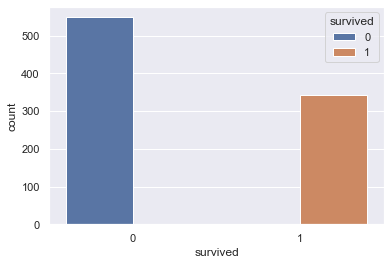

In [9]:
sns.set_theme(style="darkgrid")
sns.countplot(data=titanic, x = 'survived', hue = 'survived')

### pclass
* Majority of them are from 3rd class.

<AxesSubplot:xlabel='pclass', ylabel='Count'>

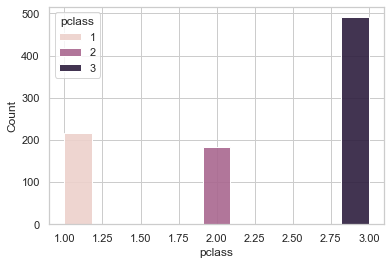

In [10]:
sns.set_theme(style="whitegrid")
sns.histplot(data=titanic, x = 'pclass', hue = 'pclass', alpha = .9)

In [11]:
titanic[['pclass', 'survived']].groupby('pclass').sum()

,survived
pclass,
1,136
2,87
3,119


Text(0, 0.5, 'Survival Probability')

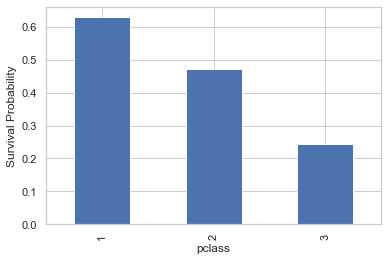

In [12]:
plt = titanic[['pclass', 'survived']].groupby('pclass').mean().survived.plot(kind = 'bar')
plt.set_xlabel('pclass')
plt.set_ylabel('Survival Probability')

* From the above results, we can say that, 1st class has high chance of surviving than the other two classes.

### Sex

* Majority of them are male

<AxesSubplot:xlabel='sex', ylabel='count'>

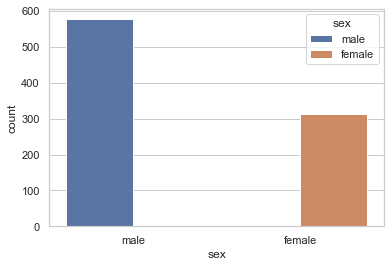

In [13]:
sns.countplot(data = titanic, x = 'sex', hue = 'sex')

### Sex - Survival Probability
* As we see, the survival probaility for Female is more. They might have given more priority to female than male.

<AxesSubplot:xlabel='sex', ylabel='survived'>

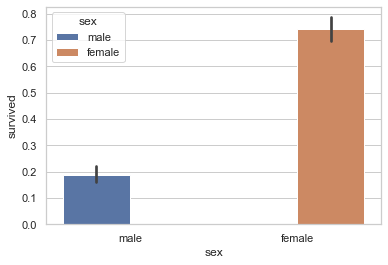

In [14]:
sns.barplot(data = titanic, x = 'sex', y = 'survived', hue = 'sex')

### Embarked

* Most of passenger are from Southampton 

<AxesSubplot:xlabel='embarked', ylabel='count'>

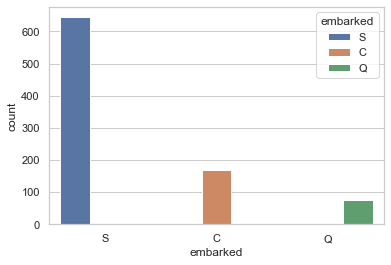

In [15]:
sns.countplot(data=titanic, x = 'embarked', hue = 'embarked')

### Embarked - Survival probability

* Survival probability: C > Q > S

<AxesSubplot:xlabel='embarked', ylabel='survived'>

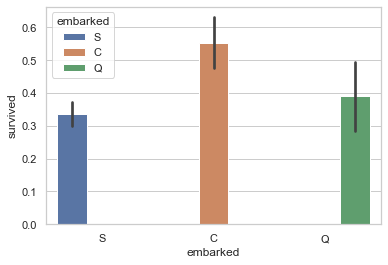

In [16]:
sns.barplot(data=titanic, x = 'embarked', y = 'survived', hue = 'embarked')

### sibsp Siblings/Spouse

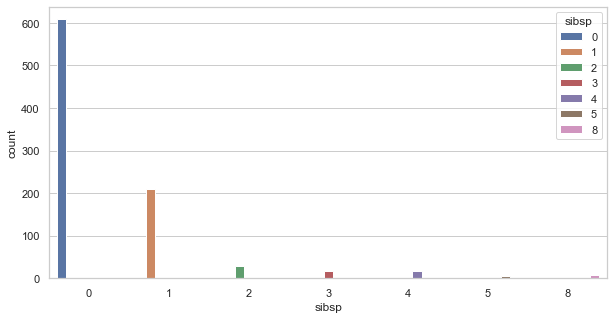

In [17]:
ax = sns.countplot(data=titanic, x = 'sibsp',hue = 'sibsp')
ax.figure.set_size_inches(10,5)

In [18]:
titanic[['sibsp', 'survived']].groupby('sibsp').count()

,survived
sibsp,
0,608
1,209
2,28
3,16
4,18
5,5
8,7


In [19]:
titanic[['sibsp', 'survived']].groupby('sibsp').sum()

,survived
sibsp,
0,210
1,112
2,13
3,4
4,3
5,0
8,0


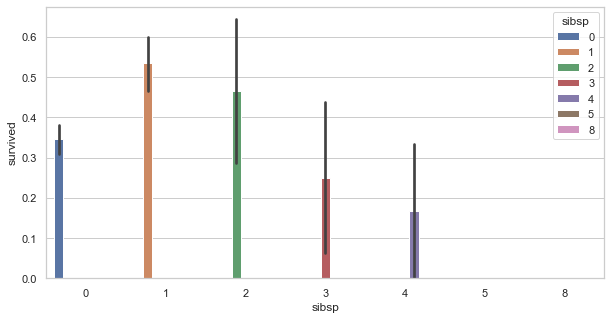

In [20]:
ax = sns.barplot(data=titanic, x = 'sibsp', y = 'survived', hue = 'sibsp')
ax.figure.set_size_inches(10,5)

* The passengers having one sibling/spouse has more survival probability.
'1' > '2' > '0' > '3' > '4'

### parch - Children/Parents

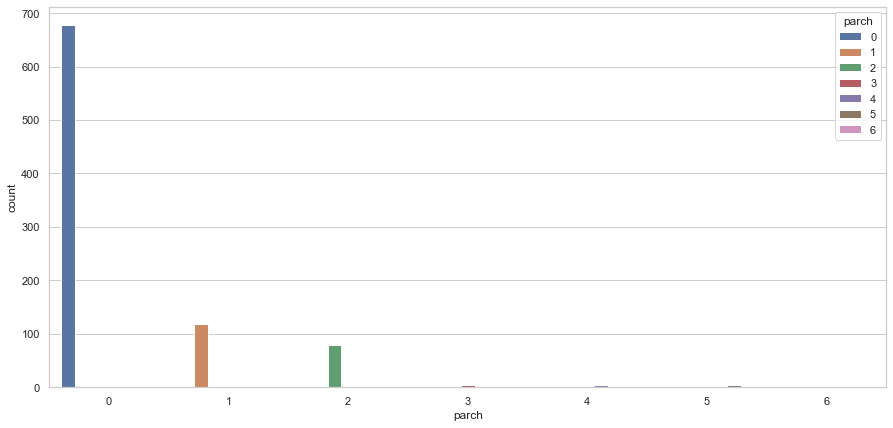

In [21]:
ax = sns.countplot(data=titanic, x = 'parch', hue = 'parch')
ax.figure.set_size_inches(15,7)

In [22]:
titanic[['parch', 'survived']].groupby('parch').count()

,survived
parch,
0,678
1,118
2,80
3,5
4,4
5,5
6,1


In [23]:
titanic[['parch', 'survived']].groupby('parch').sum()

,survived
parch,
0,233
1,65
2,40
3,3
4,0
5,1
6,0


* As we can see, majority of them have no Children/Parents.

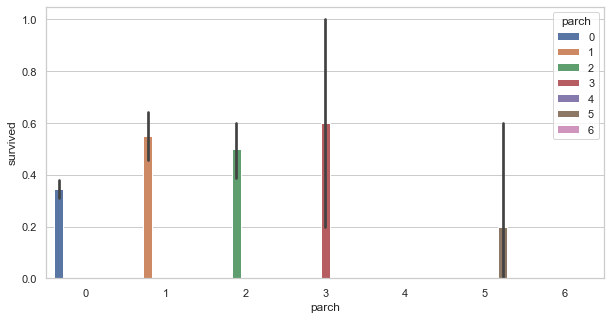

In [24]:
ax = sns.barplot(data = titanic, y = 'survived', x = 'parch', hue ='parch')
ax.figure.set_size_inches(10,5)

* Create a new feature 'Family size' from the features 'sibsp' and 'parch'

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1, shuffle=False)

In [26]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [27]:
X_train['FamilySize'] = X_train['sibsp'] + X_train['parch'] + 1

In [28]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,FamilySize
0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,2
1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,2
4,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


### Remove unnecessary columns
* Remove 'Deck' as it has a lot of missing values in both train and test data and it doesn't affect the target much
* Remove 'alone' as we already has 'family size' determining wheter or not is the passenger accompanied
* Remove 'alive' since it and the target are the same
* Remove 'class' since it and 'pclass' are the same
* Remove 'embarked_town' since it and 'embarked' are the same
* Remove 'sex' since 'who' column has already covered both male and female

In [29]:
X_train.isna().sum()

pclass           0
sex              0
age            147
sibsp            0
parch            0
fare             0
embarked         1
class            0
who              0
adult_male       0
deck           551
embark_town      1
alive            0
alone            0
FamilySize       0
dtype: int64

<AxesSubplot:xlabel='deck', ylabel='count'>

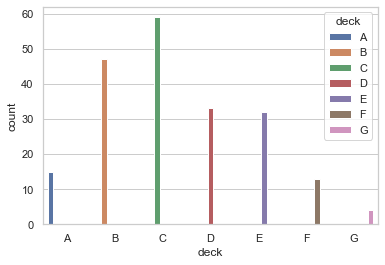

In [30]:
sns.countplot(data = titanic, x = 'deck', hue = 'deck')

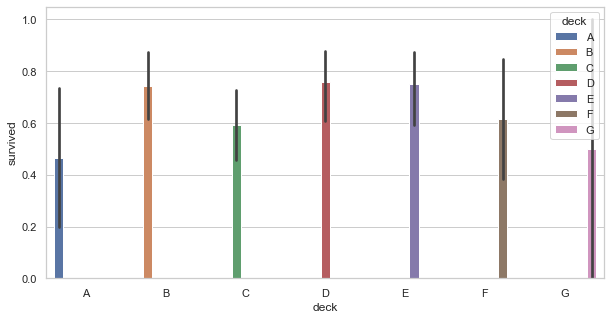

In [31]:
ax = sns.barplot(data = titanic, x = 'deck', y = 'survived', hue = 'deck')
ax.figure.set_size_inches(10,5)


In [32]:
X_train = X_train.drop(columns=['alive','deck','alone', 'class', 'embark_town', 'sex'])

### Map 'who' and 'Embarked' to numerical values.

In [33]:
X_train['who'] = X_train['who'].map({'man':0, 'woman':1, 'child': 2})
X_train['embarked'] = X_train['embarked'].map({'C':0, 'Q':1, 'S':2})

# Correlation between columns

In [34]:
corr_matrix = X_train.corr()

<AxesSubplot:>

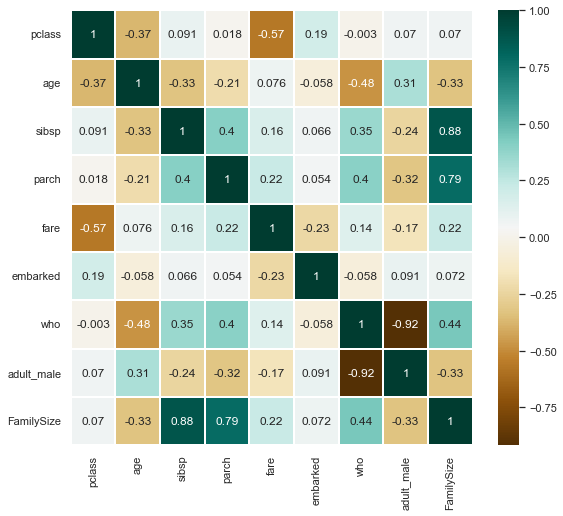

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,8))
sns.heatmap(data=corr_matrix, cmap='BrBG', annot=True, linewidths=0.2)

* There are no very highly correlated columns.

# Handling missing values

In [36]:
X_train.isna().sum()

pclass          0
age           147
sibsp           0
parch           0
fare            0
embarked        1
who             0
adult_male      0
FamilySize      0
dtype: int64

* Since there are only 2 missing values in 'embarked' column, we will impute it with majority' class
* Let's check what is the majority class in 'embarked' column

<AxesSubplot:xlabel='embarked', ylabel='count'>

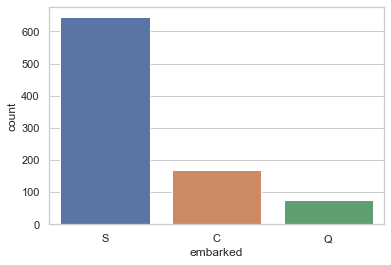

In [37]:
sns.countplot(data=titanic, x='embarked')

* The majority class is 'S'. Impute the unkonown values (NaN) using 'S'

In [38]:
X_train['embarked'] = X_train['embarked'].fillna(2)
X_train.isnull().sum()

pclass          0
age           147
sibsp           0
parch           0
fare            0
embarked        0
who             0
adult_male      0
FamilySize      0
dtype: int64

## Missing values - 'age'
* Let's find the columns that are useful to predict the value of age

In [39]:
corr_matrix = X_train[['pclass', 'age', 'sibsp', 'parch', 'fare', 'who']].corr()

<AxesSubplot:>

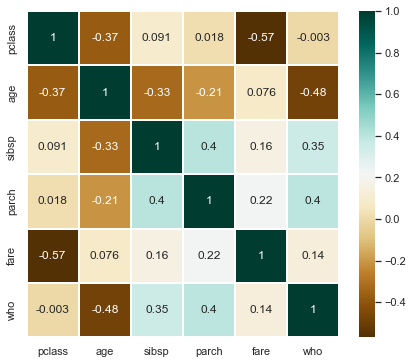

In [40]:
plt.figure(figsize=(7, 6))
sns.heatmap(data = corr_matrix,cmap='BrBG', annot=True, linewidths=0.2)

* age is not correlated 'Fare'. So, we don't consider this column while imputing 'age'.
* 'pclass', 'sibsp', 'parch' and 'who' are negatively correlated with 'age'.
* Let's fill age with the median age of similar rows from 'pclass', 'sibsp', 'parch' and 'who. If there are no similar rows, fill the age with the median age of total dataset.

In [41]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [42]:
NaN_indexes = X_train['age'][X_train['age'].isna()].index

In [43]:
X_train.reset_index(inplace=True, drop=True)

In [44]:
for i in NaN_indexes:
    pred_age = X_train['age'][((X_train.sibsp == X_train.iloc[i]["sibsp"]) 
    & (X_train.parch == X_train.iloc[i]["parch"]) 
    & (X_train.pclass == X_train.iloc[i]["pclass"])
    & (X_train.who == X_train.iloc[i]["who"]))].median()
    if not np.isnan(pred_age):
        X_train['age'].iloc[i] = pred_age
    else:
        X_train['age'].iloc[i] = X_train['age'].median()

C:\Users\PC10\AppData\Local\Temp\ipykernel_1336\4039753241.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['age'].iloc[i] = pred_age
C:\Users\PC10\AppData\Local\Temp\ipykernel_1336\4039753241.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['age'].iloc[i] = pred_age
C:\Users\PC10\AppData\Local\Temp\ipykernel_1336\4039753241.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['age'].iloc[i] = pred_age
C:\U

In [45]:
X_train.isna().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
embarked      0
who           0
adult_male    0
FamilySize    0
dtype: int64

In [46]:
X_train.head()

,pclass,age,sibsp,parch,fare,embarked,who,adult_male,FamilySize
0,3,22.0,1,0,7.2500,2.0,0,True,2
1,1,38.0,1,0,71.2833,0.0,1,False,2
2,3,26.0,0,0,7.9250,2.0,1,False,1
3,1,35.0,1,0,53.1000,2.0,1,False,2
4,3,35.0,0,0,8.0500,2.0,0,True,1


# Preprocess Test Data

In [47]:
X_test.isna().sum()

pclass           0
sex              0
age             30
sibsp            0
parch            0
fare             0
embarked         1
class            0
who              0
adult_male       0
deck           137
embark_town      1
alive            0
alone            0
dtype: int64

## Drop unnecessary columns

In [48]:
X_test = X_test.drop(columns=['alive','deck','alone', 'class', 'embark_town', 'sex'])

In [49]:
X_test.head()

,pclass,age,sibsp,parch,fare,embarked,who,adult_male
712,1,48.0,1,0,52.0000,S,man,True
713,3,29.0,0,0,9.4833,S,man,True
714,2,52.0,0,0,13.0000,S,man,True
715,3,19.0,0,0,7.6500,S,man,True
716,1,38.0,0,0,227.5250,C,woman,False


## Convert Categorial columns to Numerical values

In [50]:
X_test['who'] = X_test['who'].map({'man':0, 'woman':1, 'child': 2})
X_test['embarked'] = X_test['embarked'].map({'C':0, 'Q':1, 'S':2})

## Impute 'age' using median of columns 'SibSp', 'Parch' and 'Pclass' and 'who'

In [51]:
NaN_indexes_test = X_test['age'][X_test['age'].isna()].index

In [52]:
X_test.reset_index(inplace=True, drop=True)

In [53]:
for i in NaN_indexes_test:
    pred_age = X_test['age'][((X_test.sibsp == X_test.iloc[i]["sibsp"]) 
    & (X_test.parch == X_test.iloc[i]["parch"]) 
    & (X_test.pclass == X_test.iloc[i]["pclass"])
    & (X_train.who == X_train.iloc[i]["who"]))].median()
    
    if not np.isnan(pred_age):
        X_test['age'].iloc[i] = pred_age
    else:
        X_test['age'].iloc[i] = X_test['age'].median()

IndexError: single positional indexer is out-of-bounds

In [ ]:
X_test.isna().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
embarked      1
who           0
adult_male    0
dtype: int64

* Replace NaN in 'embarked' with the mode of the column which is 'S'

In [ ]:
X_test['embarked'] = X_train['embarked'].fillna(2)
X_test.isnull().sum()

pclass        0
age           0
sibsp         0
parch         0
fare          0
embarked      0
who           0
adult_male    0
dtype: int64

## Create a new feature 'FamilySize' from 'SibSp' and 'Parch'

In [ ]:
X_test['FamilySize'] = X_test['sibsp'] + X_test['parch'] + 1

In [ ]:
X_test.head()

,pclass,age,sibsp,parch,fare,embarked,who,adult_male,FamilySize
0,1,48.0,1,0,52.0000,2.0,0,True,2
1,3,29.0,0,0,9.4833,0.0,0,True,1
2,2,52.0,0,0,13.0000,2.0,0,True,1
3,3,19.0,0,0,7.6500,2.0,0,True,1
4,1,38.0,0,0,227.5250,2.0,1,False,1


In [ ]:
y_train


0      0
1      1
2      1
3      1
4      0
      ..
707    1
708    1
709    1
710    1
711    0
Name: survived, Length: 712, dtype: int64

In [ ]:
y_test

712    1
713    0
714    0
715    0
716    1
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 179, dtype: int64

In [ ]:
X_train

,pclass,age,sibsp,parch,fare,embarked,who,adult_male,FamilySize
0,3,22.0,1,0,7.2500,2.0,0,True,2
1,1,38.0,1,0,71.2833,0.0,1,False,2
2,3,26.0,0,0,7.9250,2.0,1,False,1
3,1,35.0,1,0,53.1000,2.0,1,False,2
4,3,35.0,0,0,8.0500,2.0,0,True,1
...,...,...,...,...,...,...,...,...,...
707,1,42.0,0,0,26.2875,2.0,0,True,1
708,1,22.0,0,0,151.5500,2.0,1,False,1
709,3,26.5,1,1,15.2458,0.0,0,True,3
710,1,24.0,0,0,49.5042,0.0,1,False,1


In [ ]:
X_test

,pclass,age,sibsp,parch,fare,embarked,who,adult_male,FamilySize
0,1,48.0,1,0,52.0000,2.0,0,True,2
1,3,29.0,0,0,9.4833,0.0,0,True,1
2,2,52.0,0,0,13.0000,2.0,0,True,1
3,3,19.0,0,0,7.6500,2.0,0,True,1
4,1,38.0,0,0,227.5250,2.0,1,False,1
...,...,...,...,...,...,...,...,...,...
174,2,27.0,0,0,13.0000,0.0,0,True,1
175,1,19.0,0,0,30.0000,2.0,1,False,1
176,3,1.0,1,2,23.4500,2.0,1,False,4
177,1,26.0,0,0,30.0000,0.0,0,True,1


# Feature Scaling 

* Normalization: Normalization is recommended when you have a normal distribution in most of your features.

                        **X_new = (X - X_min)/(X_max - X_min)**

* Standardization: Works well in every case, always recommended! You will always do some relevant feature scaling and this will always improve the training process.

                            **X_new = (X - mean)/Std**

In [ ]:
col_list = list(X_train)

* Personal note: Here I change the position of 2 columns 'adult_male' and 'FamilySize' to make it easier to use the Standardize function, since 'adult_male' is a dummy variable(0 and 1, True and False) we wont include it our Standardization.

In [ ]:
def df_column_switch(df, column1, column2):
    i = list(df.columns)
    a, b = i.index(column1), i.index(column2)
    i[b], i[a] = i[a], i[b]
    df = df[i]
    return df

In [ ]:
X_train=df_column_switch(X_train, 'adult_male', 'FamilySize')
X_test=df_column_switch(X_test, 'adult_male', 'FamilySize')

In [ ]:
X_train

,pclass,age,sibsp,parch,fare,embarked,who,FamilySize,adult_male
0,3,22.0,1,0,7.2500,2.0,0,2,True
1,1,38.0,1,0,71.2833,0.0,1,2,False
2,3,26.0,0,0,7.9250,2.0,1,1,False
3,1,35.0,1,0,53.1000,2.0,1,2,False
4,3,35.0,0,0,8.0500,2.0,0,1,True
...,...,...,...,...,...,...,...,...,...
707,1,42.0,0,0,26.2875,2.0,0,1,True
708,1,22.0,0,0,151.5500,2.0,1,1,False
709,3,26.5,1,1,15.2458,0.0,0,3,True
710,1,24.0,0,0,49.5042,0.0,1,1,False


In [ ]:
X_test

,pclass,age,sibsp,parch,fare,embarked,who,FamilySize,adult_male
0,1,48.0,1,0,52.0000,2.0,0,2,True
1,3,29.0,0,0,9.4833,0.0,0,1,True
2,2,52.0,0,0,13.0000,2.0,0,1,True
3,3,19.0,0,0,7.6500,2.0,0,1,True
4,1,38.0,0,0,227.5250,2.0,1,1,False
...,...,...,...,...,...,...,...,...,...
174,2,27.0,0,0,13.0000,0.0,0,1,True
175,1,19.0,0,0,30.0000,2.0,1,1,False
176,3,1.0,1,2,23.4500,2.0,1,4,False
177,1,26.0,0,0,30.0000,0.0,0,1,True


### Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.iloc[:, 0:9] = sc.fit_transform(X_train.iloc[:, 0:9])
X_test.iloc[:, 0:9] = sc.fit_transform(X_test.iloc[:, 0:9])


### Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mc = MinMaxScaler()
X_train.iloc[:, 0:9] = mc.fit_transform(X_train.iloc[:, 0:9])
X_test.iloc[:, 0:9] = mc.fit_transform(X_test.iloc[:, 0:9])

In [ ]:
X_train

,pclass,age,sibsp,parch,fare,embarked,who,FamilySize,adult_male
0,0.832910,-0.576440,0.443694,-0.470152,-0.519332,0.598250,-0.744214,0.056974,0.812203
1,-1.553536,0.620408,0.443694,-0.470152,0.797182,-1.907363,0.791671,0.056974,-1.231219
2,0.832910,-0.277228,-0.496514,-0.470152,-0.505454,0.598250,0.791671,-0.576863,-1.231219
3,-1.553536,0.395999,0.443694,-0.470152,0.423337,0.598250,0.791671,0.056974,-1.231219
4,0.832910,0.395999,-0.496514,-0.470152,-0.502884,0.598250,-0.744214,-0.576863,0.812203
...,...,...,...,...,...,...,...,...,...
707,-1.553536,0.919620,-0.496514,-0.470152,-0.127924,0.598250,-0.744214,-0.576863,0.812203
708,-1.553536,-0.576440,-0.496514,-0.470152,2.447452,0.598250,0.791671,-0.576863,-1.231219
709,0.832910,-0.239827,0.443694,0.760540,-0.354940,-1.907363,-0.744214,0.690812,0.812203
710,-1.553536,-0.426834,-0.496514,-0.470152,0.349407,-1.907363,0.791671,-0.576863,-1.231219


In [ ]:
X_test

,pclass,age,sibsp,parch,fare,embarked,who,FamilySize,adult_male
0,-1.618044,1.489863,0.399872,-0.488690,0.392431,0.584855,-0.738438,0.067263,0.810807
1,0.805637,0.050605,-0.404365,-0.488690,-0.401698,-1.937773,-0.738438,-0.506078,0.810807
2,-0.406204,1.792865,-0.404365,-0.488690,-0.336013,0.584855,-0.738438,-0.506078,0.810807
3,0.805637,-0.706900,-0.404365,-0.488690,-0.435940,0.584855,-0.738438,-0.506078,0.810807
4,-1.618044,0.732359,-0.404365,-0.488690,3.670895,0.584855,0.698305,-0.506078,-1.233340
...,...,...,...,...,...,...,...,...,...
174,-0.406204,-0.100896,-0.404365,-0.488690,-0.336013,-1.937773,-0.738438,-0.506078,0.810807
175,-1.618044,-0.706900,-0.404365,-0.488690,-0.018486,0.584855,0.698305,-0.506078,-1.233340
176,0.805637,-2.070408,0.399872,2.084121,-0.140827,0.584855,0.698305,1.213946,-1.233340
177,-1.618044,-0.176647,-0.404365,-0.488690,-0.018486,-1.937773,-0.738438,-0.506078,0.810807


# Logistic Regression

## Training the Logistic Regression Model on the Training Set

In [ ]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicting a new result

In [ ]:
print(classifier.predict(sc.transform([[3,22,1,0,7.25,2,0,2,1]])))

[0]


C:\Users\PC10\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\PC10\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Predicting the test set result

In [ ]:
y_pred = classifier.predict(X_test)
y_test = y_test.to_numpy()
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]

## Making the Confusion Matrix

### Standardization

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[101  14]
 [ 12  52]]
0.8547486033519553


### Normalization

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[101  14]
 [ 12  52]]
0.8547486033519553


### No Feature Scaling

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[103  12]
 [ 12  52]]
0.8659217877094972


# K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting a new result

In [ ]:
print(classifier.predict(sc.transform([[3,22,1,0,7.25,2,0,2,1]])))

[0]


C:\Users\PC10\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\PC10\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


## Predicting the test set result

In [ ]:
y_pred = classifier.predict(X_test)
y_test = y_test.to_numpy()
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]

## Making the Confusion Matrix

### Normalization

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[99 16]
 [15 49]]
0.8268156424581006


### Standardization

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[99 16]
 [15 49]]
0.8268156424581006


### No Feature Scaling

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[90 25]
 [22 42]]
0.7374301675977654


# Support Vector Machine


In [ ]:
from sklearn.svm import SVC 
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

## Predicting the test set results

In [ ]:
y_pred = classifier.predict(X_test)
y_test = y_test.to_numpy()
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]

## Making the Confusion Matrix

### Normalization

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[102  13]
 [ 12  52]]
0.8603351955307262


### Standardization

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[102  13]
 [ 12  52]]
0.8603351955307262


### No Feature Scaling

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[104  11]
 [ 14  50]]
0.8603351955307262


# Kernel SVM

In [ ]:
from sklearn.svm import SVC 
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Predicting the test set result

In [ ]:
y_pred = classifier.predict(X_test)
y_test = y_test.to_numpy()
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]

## Making the Confusion Matrix

### Normalization

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[107   8]
 [ 16  48]]
0.8659217877094972


### Standardization

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[104  11]
 [ 14  50]]
0.8603351955307262


### No Feature Scaling

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[106   9]
 [ 43  21]]
0.7094972067039106


# Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)
y_test = y_test.to_numpy()
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]

## Making the Confusion Matrix

### Normalization

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[101  14]
 [ 12  52]]
0.8547486033519553


### Standardization

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[101  14]
 [ 12  52]]
0.8547486033519553


### No Feature Scaling

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[103  12]
 [ 14  50]]
0.8547486033519553


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
y_test = y_test.to_numpy()
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]

## Making the Confusion Matrix

### Normalization

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[99 16]
 [18 46]]
0.8100558659217877


### Standardization

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[94 21]
 [12 52]]
0.8156424581005587


### No Feature Scaling

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[99 16]
 [16 48]]
0.8212290502793296


# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
y_test = y_test.to_numpy()
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)), 1))

[[1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]

## Making the Confusion Matrix

### Normalization

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[92 23]
 [22 42]]
0.7486033519553073


### Standardization

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[83 32]
 [10 54]]
0.7653631284916201


### No Feature Scaling

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
print(cm)
print(acc)

[[88 27]
 [22 42]]
0.7262569832402235


# Evaluating models

In [54]:
df = pd.DataFrame(
    {
        "No Feature Scaling": [0.71,0.855,0.726,.821,0.866,0.737,0.860],
        "Standardization": [0.860,0.855,0.765,0.816,0.855,0.827,0.860],
        "Normalization": [0.866,0.855,0.749,0.810,0.855,0.827,0.860],
    }
)

In [56]:
models = pd.Series(['Kernel SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Logistic Regression', 'KNN', 'SVM'])

In [57]:
df.insert(0, 'Models', models, True)

In [58]:
df

,Models,No Feature Scaling,Standardization,Normalization
0,Kernel SVM,0.710,0.860,0.866
1,Naive Bayes,0.855,0.855,0.855
2,Decision Tree,0.726,0.765,0.749
3,Random Forest,0.821,0.816,0.810
4,Logistic Regression,0.866,0.855,0.855
5,KNN,0.737,0.827,0.827
6,SVM,0.860,0.860,0.860


In [88]:
out = df.sort_values(by='Normalization', ascending=False)
out

,Models,No Feature Scaling,Standardization,Normalization
0,Kernel SVM,0.710,0.860,0.866
6,SVM,0.860,0.860,0.860
1,Naive Bayes,0.855,0.855,0.855
4,Logistic Regression,0.866,0.855,0.855
5,KNN,0.737,0.827,0.827
3,Random Forest,0.821,0.816,0.810
2,Decision Tree,0.726,0.765,0.749
